In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.3.0


In [69]:
model_df = pd.read_csv('model_df.csv')
subjects = model_df[['Unnamed: 0','Player_x','FirstNm','Last_x','LastNm', 'Suffix_x',]]
subjects

,Unnamed: 0,Player_x,FirstNm,Last_x,LastNm,Suffix_x
0,0,Derrick Williams,DERRICK,WILLIAMS,WILLIAMS,0
1,1,Mike Wallace,MIKE,WALLACE,WALLACE,0
2,2,Tiquan Underwood,TIQUAN,UNDERWOOD,UNDERWOOD,0
3,3,Patrick Turner,PATRICK,TURNER,TURNER,0
4,4,Mike Thomas,MIKE,THOMAS,THOMAS,0
...,...,...,...,...,...,...
218,273,Damian Williams,DAMIAN,WILLIAMS,WILLIAMS,0
219,276,Josh Doctson,JOSH,DOCTSON,DOCTSON,0
220,277,Trevor Davis,TREVOR,DAVIS,DAVIS,0
221,279,Marquez Valdes-Scantling,MARQUEZ,VALDES-SCANTLING,VALDES-SCANTLING,0


In [70]:
model_df.columns

Index(['Unnamed: 0', 'careerRec', 'careerRecYds', 'careerYPC', 'careerRecTds',
       'careerRushAtt', 'careerRushYds', 'careerYPA', 'careerRushTds',
       'careerPlays', 'careerTotalYds', 'careerYPT', 'careerTotalTds',
       'Player_x', 'Year_x', 'School_x', 'Conf', 'Class', 'Pos_x', 'dr_1games',
       'dr_1Rec', 'dr_1RecYds', 'dr_1YPC', 'dr_1RecTds', 'dr_1RushAtt',
       'dr_1RushYds', 'dr_1YPA', 'dr_1RushTds', 'dr_1Plays', 'dr_1TotalYds',
       'dr_1YPT', 'dr_1TotalTds', 'dr_2games', 'dr_2Rec', 'dr_2RecYds',
       'dr_2YPC', 'dr_2RecTds', 'dr_2RushAtt', 'dr_2RushYds', 'dr_2YPA',
       'dr_2RushTds', 'dr_2Plays', 'dr_2TotalYds', 'dr_2YPT', 'dr_2TotalTds',
       'dr_3games', 'dr_3Rec', 'dr_3RecYds', 'dr_3YPC', 'dr_3RecTds',
       'dr_3RushAtt', 'dr_3RushYds', 'dr_3YPA', 'dr_3RushTds', 'dr_3Plays',
       'dr_3TotalYds', 'dr_3YPT', 'dr_3TotalTds', 'FirstNm', 'Last_x',
       'LastNm', 'Suffix_x', 'Unnamed: 0.1', 'Rk', 'Year_y', 'Player_y',
       'Pos_y', 'Age', 'School_y', 'W

In [71]:
model_df.drop(columns = ['Player_x', 'Year_x','Player_x', 'Year_x','FirstNm', 'Last_x',
       'LastNm', 'Suffix_x', 'Unnamed: 0.1', 'Rk', 'Year_y', 'Player_y',
       'Pos_y','School_y', 'Player', 'Year','Last_y', 'Suffix_y','Team','Round','pickNum','year','School_x','Class','Pos_x'], inplace = True)


In [72]:
model_df=model_df[model_df['Wt']!='NoRecord']
model_df

,Unnamed: 0,careerRec,careerRecYds,careerYPC,careerRecTds,careerRushAtt,careerRushYds,careerYPA,careerRushTds,careerPlays,...,Age,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,height(in),FPTS
0,0,161.0,1743.0,10.8,9.0,117.0,594.0,5.1,8.0,278,...,22.0,194.0,4.47,33.000000,15.000000,121.655172,6.903864,4.220707,71.0,15.6
1,1,101.0,1910.0,18.9,15.0,11.0,94.0,8.5,0.0,112,...,22.0,199.0,4.33,40.000000,14.000000,129.000000,6.900000,4.270000,72.0,1705.3
2,2,132.0,1931.0,14.6,16.0,19.0,63.0,3.3,0.0,151,...,22.0,184.0,4.31,41.500000,7.000000,129.000000,6.620000,4.110000,73.0,199.7
3,3,138.0,1752.0,12.7,17.0,0.0,0.0,0.0,0.0,138,...,21.0,223.0,4.59,35.795359,14.798122,121.655172,6.903864,4.220707,77.0,28.2
4,4,259.0,3231.0,12.5,22.0,45.0,395.0,8.8,3.0,304,...,21.0,195.0,4.30,40.500000,14.798122,126.000000,6.650000,4.280000,68.0,438.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,273,147.0,2114.0,14.4,17.0,7.0,64.0,9.1,0.0,154,...,21.0,197.0,4.52,38.000000,19.000000,118.000000,6.790000,4.240000,73.0,333.4
219,276,214.0,3177.0,14.8,34.0,2.0,7.0,3.5,0.0,216,...,23.0,202.0,4.50,41.000000,14.000000,131.000000,6.840000,4.080000,74.0,237.6
220,277,109.0,1672.0,15.3,12.0,4.0,3.0,0.8,0.0,113,...,22.0,188.0,4.42,38.500000,11.000000,124.000000,6.600000,4.220000,73.0,51.1
221,279,119.0,1832.0,15.4,12.0,10.0,112.0,11.2,1.0,129,...,23.0,206.0,4.37,30.500000,15.000000,124.000000,6.903864,4.220707,76.0,195.1


In [73]:

model_df[['Age', 'Wt', 'height(in)']] = model_df[['Age', 'Wt', 'height(in)']].astype(float)

In [74]:
model_df=pd.get_dummies(model_df)

In [75]:
model_df

,Unnamed: 0,careerRec,careerRecYds,careerYPC,careerRecTds,careerRushAtt,careerRushYds,careerYPA,careerRushTds,careerPlays,...,Conf_Big Ten,Conf_CUSA,Conf_Ind,Conf_MAC,Conf_MWC,Conf_Pac-10,Conf_Pac-12,Conf_SEC,Conf_Sun Belt,Conf_WAC
0,0,161.0,1743.0,10.8,9.0,117.0,594.0,5.1,8.0,278,...,1,0,0,0,0,0,0,0,0,0
1,1,101.0,1910.0,18.9,15.0,11.0,94.0,8.5,0.0,112,...,0,0,0,0,0,0,0,1,0,0
2,2,132.0,1931.0,14.6,16.0,19.0,63.0,3.3,0.0,151,...,0,0,0,0,0,0,0,0,0,0
3,3,138.0,1752.0,12.7,17.0,0.0,0.0,0.0,0.0,138,...,0,0,0,0,0,1,0,0,0,0
4,4,259.0,3231.0,12.5,22.0,45.0,395.0,8.8,3.0,304,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,273,147.0,2114.0,14.4,17.0,7.0,64.0,9.1,0.0,154,...,0,0,0,0,0,1,0,0,0,0
219,276,214.0,3177.0,14.8,34.0,2.0,7.0,3.5,0.0,216,...,0,0,0,0,0,0,0,0,0,0
220,277,109.0,1672.0,15.3,12.0,4.0,3.0,0.8,0.0,113,...,0,0,0,0,0,0,1,0,0,0
221,279,119.0,1832.0,15.4,12.0,10.0,112.0,11.2,1.0,129,...,0,0,0,0,0,0,0,0,0,0


In [77]:
model_df=model_df.drop(columns = ['Conf_WAC'])

In [79]:
model_df.columns

Index(['Unnamed: 0', 'careerRec', 'careerRecYds', 'careerYPC', 'careerRecTds',
       'careerRushAtt', 'careerRushYds', 'careerYPA', 'careerRushTds',
       'careerPlays', 'careerTotalYds', 'careerYPT', 'careerTotalTds',
       'dr_1games', 'dr_1Rec', 'dr_1RecYds', 'dr_1YPC', 'dr_1RecTds',
       'dr_1RushAtt', 'dr_1RushYds', 'dr_1YPA', 'dr_1RushTds', 'dr_1Plays',
       'dr_1TotalYds', 'dr_1YPT', 'dr_1TotalTds', 'dr_2games', 'dr_2Rec',
       'dr_2RecYds', 'dr_2YPC', 'dr_2RecTds', 'dr_2RushAtt', 'dr_2RushYds',
       'dr_2YPA', 'dr_2RushTds', 'dr_2Plays', 'dr_2TotalYds', 'dr_2YPT',
       'dr_2TotalTds', 'dr_3games', 'dr_3Rec', 'dr_3RecYds', 'dr_3YPC',
       'dr_3RecTds', 'dr_3RushAtt', 'dr_3RushYds', 'dr_3YPA', 'dr_3RushTds',
       'dr_3Plays', 'dr_3TotalYds', 'dr_3YPT', 'dr_3TotalTds', 'Age', 'Wt',
       '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle',
       'height(in)', 'FPTS', 'Conf_ACC', 'Conf_American', 'Conf_Big 12',
       'Conf_Big East', 'Conf_Big Ten'

In [81]:
X = model_df.drop(columns = ['FPTS'])
y = model_df['FPTS'].values.reshape(-1,1)
print(X.shape, y.shape)

(221, 74) (221, 1)


In [89]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state=27)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

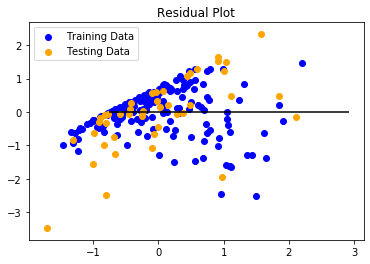

In [90]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [91]:
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1342799933233285, R2: -0.5422711407861691


In [92]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8130474077026575, R2: -0.10549384664442152


In [93]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1307974064459971, R2: -0.5375358961659655


In [94]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8570560676857428, R2: -0.16533205822895414


In [105]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=74),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [106]:
model = build_model()

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4800      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
6/6 - 0s - loss: 1.2245 - mae: 0.8621 - mse: 1.2245
Epoch 2/60
6/6 - 0s - loss: 0.7666 - mae: 0.6455 - mse: 0.7666
Epoch 3/60
6/6 - 0s - loss: 0.6324 - mae: 0.5929 - mse: 0.6324
Epoch 4/60
6/6 - 0s - loss: 0.5596 - mae: 0.5540 - mse: 0.5596
Epoch 5/60
6/6 - 0s - loss: 0.4858 - mae: 0.5091 - mse: 0.4858
Epoch 6/60
6/6 - 0s - loss: 0.4382 - mae: 0.4988 - mse: 0.4382
Epoch 7/60
6/6 - 0s - loss: 0.3810 - mae: 0.4577 - mse: 0.3810
Epoch 8/60
6/6 - 0s - loss: 0.3503 - mae: 0.4318 - mse: 0.3503
Epoch 9/60
6/6 - 0s - loss: 0.2982 - mae: 0.3998 - mse: 0.2982
Epoch 10/60
6/6 - 0s - loss: 0.2688 - mae: 0.3772 - mse: 0.2688
Epoch 11/60
6/6 - 0s - loss: 0.2475 - mae: 0.3599 - mse: 0.2475
Epoch 12/60
6/6 - 0s - loss: 0.2147 - mae: 0.3434 - mse: 0.2147
Epoch 13/60
6/6 - 0s - loss: 0.1912 - mae: 0.3148 - mse: 0.1912
Epoch 14/60
6/6 - 0s - loss: 0.1560 - mae: 0.2805 - mse: 0.1560
Epoch 15/60
6/6 - 0s - loss: 0.1420 - mae: 0.2858 - mse: 0.1420
Epoch 16/60
6/6 - 0s - loss: 0.1163 - mae: 0.2490

In [115]:
model.fit(
    X_train,
    y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
6/6 - 0s - loss: 278371.3750 - mae: 385.6718 - mse: 278371.3750
Epoch 2/60
6/6 - 0s - loss: 216388.2031 - mae: 327.4700 - mse: 216388.2031
Epoch 3/60
6/6 - 0s - loss: 235238.5625 - mae: 348.8091 - mse: 235238.5625
Epoch 4/60
6/6 - 0s - loss: 214475.7656 - mae: 330.8731 - mse: 214475.7656
Epoch 5/60
6/6 - 0s - loss: 225632.2500 - mae: 334.1432 - mse: 225632.2500
Epoch 6/60
6/6 - 0s - loss: 213446.6562 - mae: 342.7349 - mse: 213446.6562
Epoch 7/60
6/6 - 0s - loss: 227475.0625 - mae: 343.3856 - mse: 227475.0625
Epoch 8/60
6/6 - 0s - loss: 200930.5469 - mae: 313.3300 - mse: 200930.5469
Epoch 9/60
6/6 - 0s - loss: 210936.3438 - mae: 341.5717 - mse: 210936.3438
Epoch 10/60
6/6 - 0s - loss: 205273.8906 - mae: 319.6212 - mse: 205273.8906
Epoch 11/60
6/6 - 0s - loss: 228642.0625 - mae: 362.0333 - mse: 228642.0625
Epoch 12/60
6/6 - 0s - loss: 203298.3906 - mae: 333.7085 - mse: 203298.3906
Epoch 13/60
6/6 - 0s - loss: 210198.7969 - mae: 319.5456 - mse: 210198.7969
Epoch 14/60
6/6 - 0s 

In [110]:
loss, mae, mse = model.evaluate(
    X_test_scaled, y_test_scaled, verbose=2)
print(
    f"Normal Neural Network - Loss: {loss}, MSE: {mse}")

2/2 - 0s - loss: 0.7899 - mae: 0.6770 - mse: 0.7899
Normal Neural Network - Loss: 0.7899489402770996, MSE: 0.7899489402770996


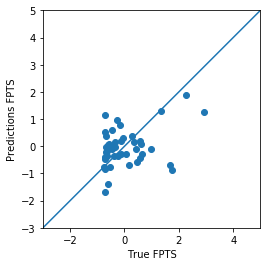

In [114]:
test_predictions = model.predict(X_test_scaled).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test_scaled, test_predictions)
plt.xlabel('True FPTS')
plt.ylabel('Predictions FPTS')
lims = [-3, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

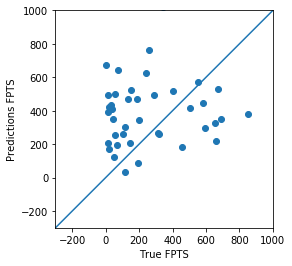

In [120]:
test_predictions = model.predict(X_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True FPTS')
plt.ylabel('Predictions FPTS')
lims = [-300,1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)